In [2]:
import numpy as np
import scipy.signal as sps
import sympy as sym 
import scipy.optimize as sopt
from scipy.integrate import ode
%matplotlib inline   
import matplotlib.pyplot as plt
from sympy.utilities.lambdify import lambdify

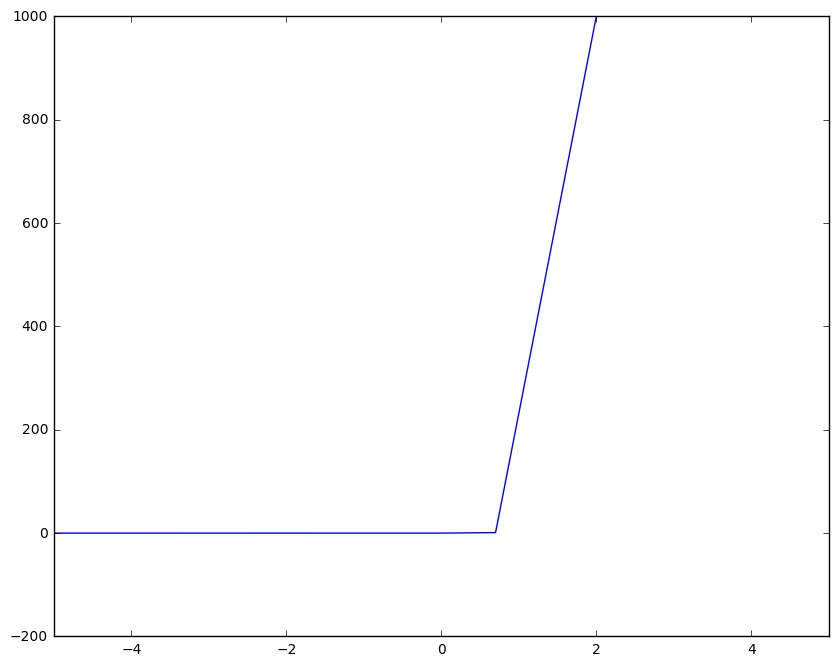

In [55]:
VD = np.array([-1000, 0.0, 0.7,  2.0])
ID = np.array([ -5.0, 0.0, 1.0, 1000])

fig = plt.figure(figsize=(10,8))

ax1    = fig.add_subplot(1,1,1)
ax1.plot(VD,ID)

ax1.set_xlim((-5,5))
plt.show()   

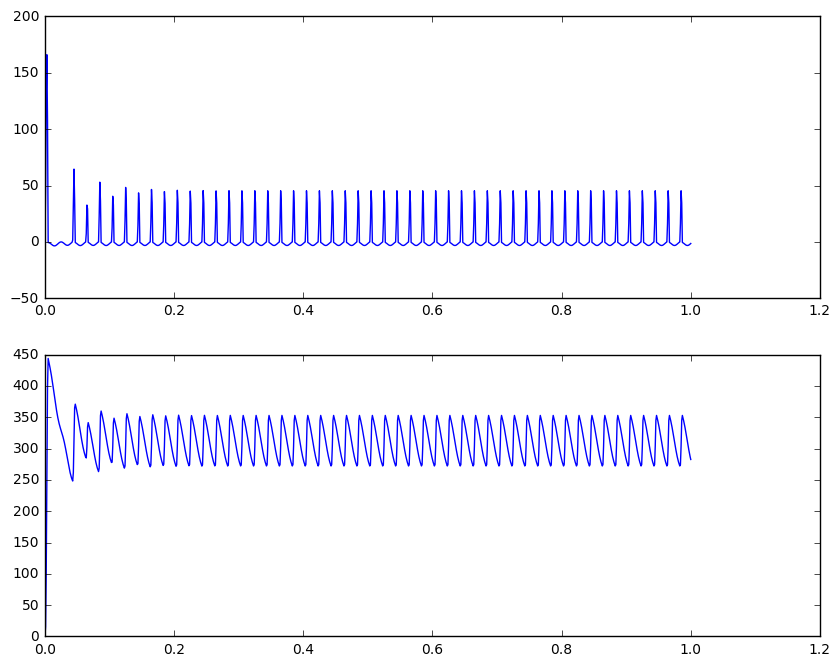

In [56]:
R_dc = 100.0
C = 1000e-6
R = 0.1
L = 1e-3



def fun(t,x,params):
    
    i_l = x[0]
    v_dc = x[1]
    
    omega = 2*np.pi*50.0
    
    v = 325*np.sin(omega*t)
    
    v_d = np.interp(i_l, ID, VD)
    
    
    di_l = 1.0/L*(v - R*i_l - v_d - v_dc)
    dv_dc = 1.0/C*(i_l - v_dc/R_dc)

        
    return [di_l, dv_dc]
    

x_0 = np.array([0.0,0.0])
r = ode(fun).set_integrator('dopri5')
r.set_initial_value(x_0,0.0).set_f_params(-20e3)
t1 = 1.0
dt = 0.001

T = [0.0]
X = [x_0]

while r.successful() and r.t < t1:
    if r.t>0.5:
        r.set_f_params(-150e3)

    T += [r.t+dt]
    X += [r.integrate(r.t+dt)]

    
T = np.array(T)
X = np.array(X)

fig = plt.figure(figsize=(10,8))

ax1    = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(T,X[:,0])
ax2.plot(T,X[:,1])

plt.show()    

/home/jmmauricio/bin/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in log2


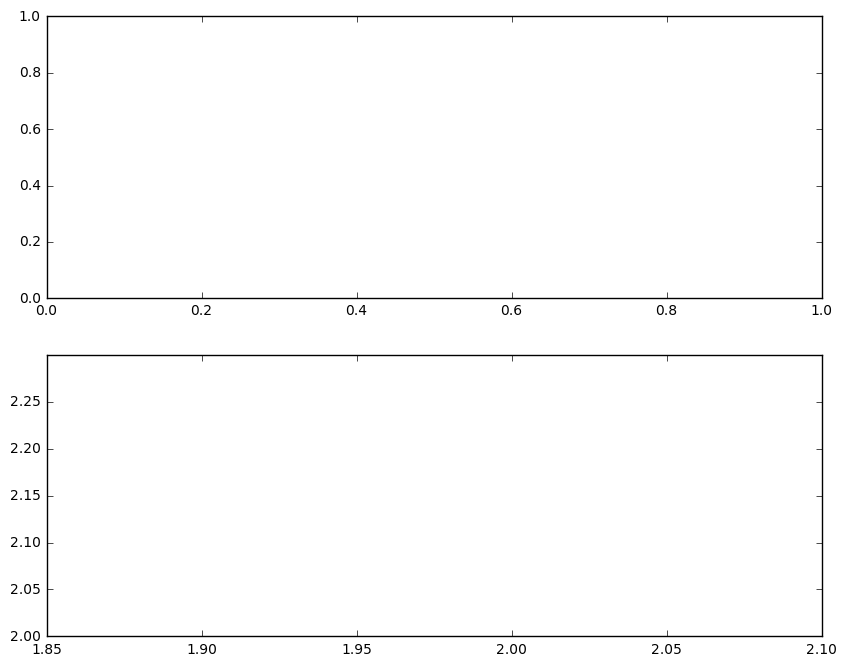

In [28]:
def i_d_eval(v_d):
    V_t = 0.1
    n = 1.5
    I_s = 0.0001
    
    I = I_s*(np.exp(v_d/(n*V_t))-1)
    
    return I

def v_d_eval(i_d):
    V_t = 0.1
    n = 1.5
    I_s = 0.0001
    
    v_d = np.log2(i_d/I_s+1)*(n*V_t) 
    
    return v_d



fig = plt.figure(figsize=(10,8))

VD = np.linspace(-100,2,10)
ID = i_d_eval(v_d)


ax1    = fig.add_subplot(2,1,1)

VD = np.linspace(-100,2,10)
ID = v_d_eval(VD)

ax2 = fig.add_subplot(2,1,2)

ax2.plot(VD,ID)

plt.show()    

In [32]:
np.log2(-2)

/home/jmmauricio/bin/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log2
  if __name__ == '__main__':


nan

/home/jmmauricio/bin/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: RuntimeWarning: overflow encountered in exp


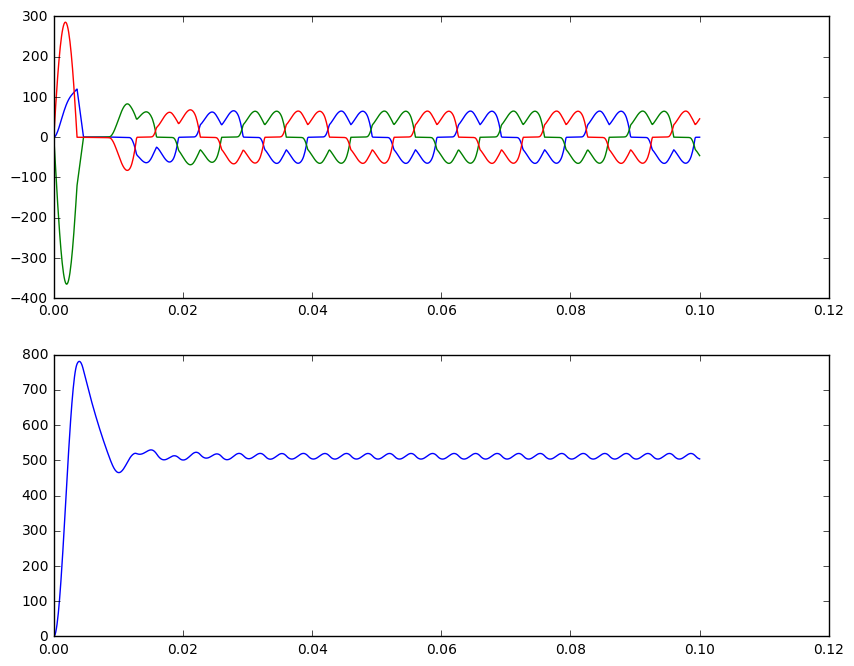

In [77]:
R_dc = 10.0
C = 1000e-6
R = 0.1
L = 1e-3

VD = np.array([-1000, 0.0, 0.7,  2.0])
ID = np.array([ -5.0, 0.0, 1.0, 1000])

def sigmoid(z):
    s = 1.0 / (1.0 + np.exp(-5.0 * z))
    return s

def fun(t,x,params):
    
    i_a = x[0]
    i_b = x[1]
    i_c = x[2]
    v_dc = x[3]
    
    omega = 2*np.pi*50.0
    
    v_s_a = 325*np.sin(omega*t)
    v_s_b = 325*np.sin(omega*t - 2.0/3.0*np.pi)
    v_s_c = 325*np.sin(omega*t - 4.0/3.0*np.pi)
    
    u_a = 0.0
    u_b = 0.0
    u_c = 0.0
        
    if i_a>=0.0: u_a = 1.0
    if i_b>=0.0: u_b = 1.0
    if i_c>=0.0: u_c = 1.0
            
    u_a = sigmoid(i_a)
    u_b = sigmoid(i_b)
    u_c = sigmoid(i_c)
    
    
    
    e_a = (2*u_a - u_b - u_c)/3.0*v_dc
    e_b = (2*u_b - u_c - u_a)/3.0*v_dc
    e_c = (2*u_c - u_a - u_b)/3.0*v_dc
    
    di_a = 1.0/L*(v_s_a - R*i_a - e_a)
    di_b = 1.0/L*(v_s_b - R*i_b - e_b)
    di_c = 1.0/L*(v_s_c - R*i_c - e_c)
    
    i_d = u_a*i_a + u_b*i_b + u_c*i_c
    
    dv_dc = 1.0/C*(i_d - v_dc/R_dc)

        
    return [di_a, di_b,di_c,dv_dc]
    

x_0 = np.array([0.0,0.0,0.0,0.0])
r = ode(fun).set_integrator('dopri5')
r.set_initial_value(x_0,0.0).set_f_params(-20e3)
t1 = 0.1
dt = 0.0001

T = [0.0]
X = [x_0]

while r.successful() and r.t < t1:
    if r.t>0.5:
        r.set_f_params(-150e3)

    T += [r.t+dt]
    X += [r.integrate(r.t+dt)]

    
T = np.array(T)
X = np.array(X)

fig = plt.figure(figsize=(10,8))

ax1    = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(T,X[:,0:3])
ax2.plot(T,X[:,3])

plt.show()    

In [109]:
import numpy as np
import scipy.signal as sps
import sympy as sym 
import scipy.optimize as sopt
from scipy.integrate import ode
%matplotlib inline   
import matplotlib.pyplot as plt
from sympy.utilities.lambdify import lambdify
import time as time

In [255]:
u_a,u_b,u_c = sym.symbols('u_a,u_b,u_c')
i_a,i_b,i_c,v_dc = sym.symbols('i_a,i_b,i_c,v_dc')
L,R,C,R_dc,omega,t,sigmoid_param = sym.symbols('L,R,C,R_dc,omega,t,sigmoid_param')

In [256]:
v_s_a = 325*sym.sin(omega*t)
v_s_b = 325*sym.sin(omega*t - 2.0/3.0*np.pi)
v_s_c = 325*sym.sin(omega*t - 4.0/3.0*np.pi)
    
u_a = 1.0 / (1.0 + sym.exp(-sigmoid_param * (i_a)))
u_b = 1.0 / (1.0 + sym.exp(-sigmoid_param * (i_b)))
u_c = 1.0 / (1.0 + sym.exp(-sigmoid_param * (i_c)))
       
e_a = (2*u_a - u_b - u_c)/3.0*v_dc
e_b = (2*u_b - u_c - u_a)/3.0*v_dc
e_c = (2*u_c - u_a - u_b)/3.0*v_dc
    
di_a = 1.0/L*(v_s_a - R*i_a - e_a)
di_b = 1.0/L*(v_s_b - R*i_b - e_b)
di_c = 1.0/L*(v_s_c - R*i_c - e_c)
    
i_d = u_a*i_a + u_b*i_b + u_c*i_c
    
dv_dc = 1.0/C*(i_d - v_dc/R_dc)

f = sym.Matrix([[di_a],[di_b],[di_c],[dv_dc]])
x = sym.Matrix([[i_a],[i_b],[i_c],[v_dc]])

F_x = f.jacobian(x)

In [251]:
params = {'L':10e-3,
          'R':0.1,
          'C':2000.0e-6,
          'omega':2.0*np.pi*50,
          'R_dc':10,
          'sigmoid_param':5.0
         }

u_sym = sym.Matrix([[i_a],[i_b],[i_c],[v_dc]])

f_sym = lambdify((t,u_sym,R_dc), f.subs(params),'numpy') # returns a numpy-ready function
jac = lambdify((t,u_sym,R_dc), F_x.subs(params),'numpy') # returns a numpy-ready function


20.452988386154175


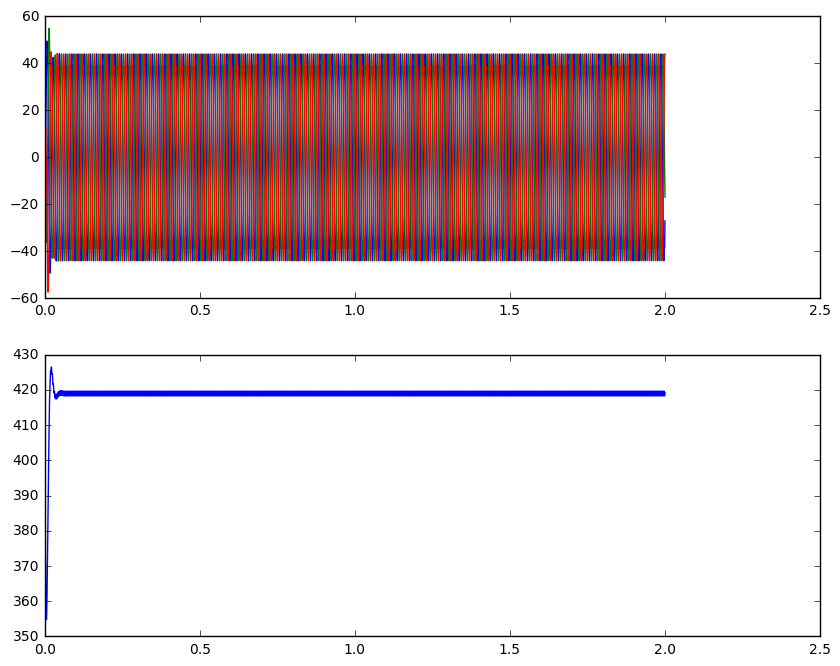

In [243]:
x_0 = np.array([0.0,0.0,0.0,400.0])
r = ode(f_sym,jac).set_integrator('dop853', method='adams')
r.set_initial_value(x_0,0.0).set_f_params(10).set_jac_params(10.0)
t1 = 2.0
dt = 0.0001

T = [0.0]
X = [x_0]

t_0 = time.time()
while r.successful() and r.t < t1:
    if r.t>0.5:
        r.set_f_params(10).set_jac_params(10.0)

    T += [r.t+dt]
    X += [r.integrate(r.t+dt)]

print(time.time() - t_0)
    
T = np.array(T).real
X = np.array(X).real

fig = plt.figure(figsize=(10,8))

ax1    = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(T,X[:,0:3])
ax2.plot(T,X[:,3])

plt.show()    

/home/jmmauricio/bin/anaconda3/lib/python3.5/site-packages/numpy/__init__.py:1: RuntimeWarning: overflow encountered in exp
  """


14.144705057144165


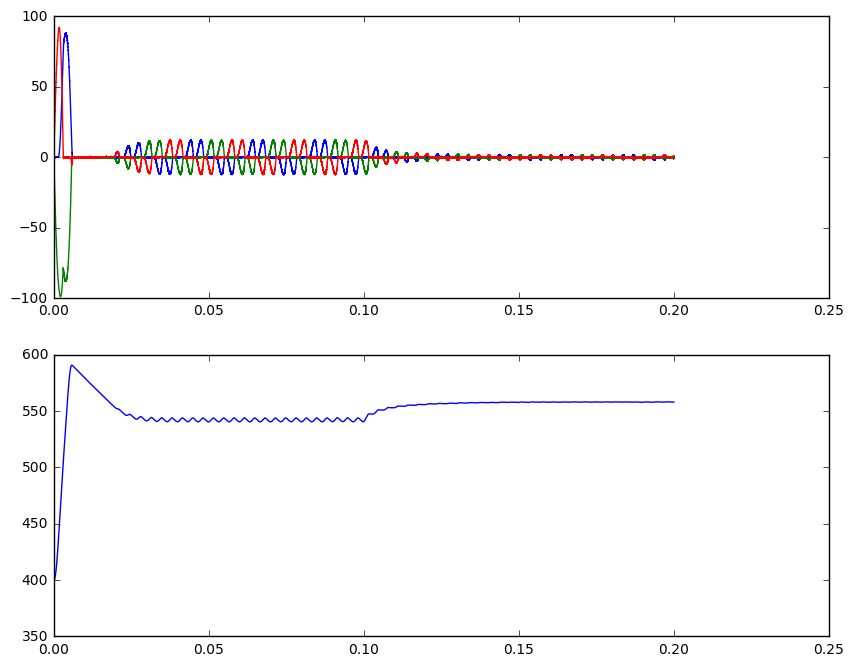

In [269]:
params = {'L':1e-3,
          'R':0.1,
          'C':2000.0e-6,
          'omega':2.0*np.pi*50,
          'sigmoid_param':1000.0
         }

u_sym = sym.Matrix([[i_a],[i_b],[i_c],[v_dc]])

f_sym = lambdify((t,u_sym,R_dc), f.subs(params),'numpy') # returns a numpy-ready function
jac = lambdify((t,u_sym,R_dc), F_x.subs(params),'numpy') # returns a numpy-ready function


x_0 = np.array([0.0,0.0,0.0,400.0])
t1 = 0.2
dt = 1e-6

T = [0.0]
X = [x_0]
x_i = x_0
t_0 = time.time()
t_i = 0.0

R_dc_val = 100.0 
while t_i < t1:
             
    t_i += dt
    T += [t_i]
    
    if t_i>0.1: R_dc_val = 1.0e3
    
    x_i = x_i + dt*f_sym(t_i,x_i,R_dc_val).reshape(4)
             
    X += [x_i]

print(time.time() - t_0)
    
T = np.array(T).real
X = np.array(X).real

fig = plt.figure(figsize=(10,8))

ax1    = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(T,X[:,0:3])
ax2.plot(T,X[:,3])

plt.show()    

In [232]:
f_sym(t,x_0,10.0).reshape(4)

array([  20406.91884703, -291106.32207781,  270699.40323078,  -20000.        ])

In [16]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.layouts import gridplot
output_notebook()


Loading BokehJS ...

In [3]:
import numba 
from numba import float64
import numpy as np
import matplotlib.pyplot as plt
import diode
import solver


R_dc = 1000.0
C = 2000e-6
R = 1.0
L = 1e-3
omega = 2.0*np.pi*50.0
t = 0.0
sigmoid_param = 2500

VD = np.array([-1000, 0.0, 0.7,  2.0])
ID = np.array([ -5.0, 0.0, 1.0, 1000])

from numba import jit

#@numba.jit(float64[:](float64,float64,float64[:],float64,float64[:]))
@numba.jit
def f_diode(t,u,x,y,param):
    
    i_a = x[0]
    i_b = x[1]
    i_c = x[2]
    v_dc = x[3]
    
    R_dc = param[0]
    V_ac = param[1]
    omega = param[3]
    L = param[4]
    R = param[5]
    
    v_s_a = V_ac*np.sin(omega*t)
    v_s_b = V_ac*np.sin(omega*t - 2.0/3.0*np.pi)
    v_s_c = V_ac*np.sin(omega*t - 4.0/3.0*np.pi)
    
    u_a = 0.0
    if i_a >= 0.0: u_a = 1.0       
    
    u_b = 0.0
    if i_b >= 0.0: u_b = 1.0 
     
    u_c = 0.0
    if i_c >= 0.0: u_c = 1.0 
                   
    e_a = (2*u_a - u_b - u_c)/3.0*v_dc
    e_b = (2*u_b - u_c - u_a)/3.0*v_dc
    e_c = (2*u_c - u_a - u_b)/3.0*v_dc

    di_a = 1.0/L*(v_s_a - R*i_a - e_a)
    di_b = 1.0/L*(v_s_b - R*i_b - e_b)
    di_c = 1.0/L*(v_s_c - R*i_c - e_c)

    i_d = u_a*i_a + u_b*i_b + u_c*i_c

    dv_dc = 1.0/C*(i_d - (v_dc)/R_dc)

    return np.array([di_a, di_b,di_c,dv_dc])

@numba.jit
def run():
    dt = 5e-6
    t_end = 2.0   
    decimation = 10
    
    N_steps = int(t_end/dt/decimation)
    T = np.zeros((N_steps,1))
    X = np.zeros((N_steps,4))
    
    t = 0.0
    x_0 = np.array([0.0,0.0,0.0,400.0])
    x = x_0

    X[0,:] = x
    
    param = np.array([10,  # R_dc
                      325.0, # V_ac
                      2.0*np.pi*50.0,
                      L,
                      R,
                      C
                     ])


    
    it = 0
    it_decimation = 0
    it_save = 0
    solver = 'fweuler'
    for it in range(N_steps):   
        if t > 1.0:
            param[0] = 10.0
            
        t += dt        

        if solver == 'fweuler':
            # solver trapezoidal 1 step
            x = x + dt*(diode.f_diode(t,0.0,x,0.0,param))
        
        if solver == 'trapezoidal':
            # solver trapezoidal 1 step
            f_1 = f_diode(t,0.0,x,0.0,param)
            x_1 = x + dt*f_1
            x = x + 0.5*dt*(f_diode(t,0.0,x_1,0.0,param) + f_1)

        
        
        if it_decimation >= decimation:
            it_save += 1  
            X[it_save,:] = x
            T[it_save,:] = t
            it_decimation = 0
            
        it_decimation += 1
              
        
        
    return T,X
   
%timeit run()

T,X = run()

fig1 = figure(width=800, height=300)
fig1.line(x=T[:,0], y=X[:-10,0], color="red")
fig1.line(x=T[:,0], y=X[:-10,1], color="green")
fig1.line(x=T[:,0], y=X[:-10,2], color="blue")
 
fig2 = figure(width=800, height=300,  x_range=fig1.x_range,)
fig2.line(x=T[:,0], y=X[:,3], color="magenta")

figs = gridplot([[fig1], [fig2]])

show(figs)

Loading BokehJS ...

The slowest run took 5.65 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 758 ms per loop


In [17]:
fig1 = figure(width=800, height=300)
fig1.line(x=T[0:1000,0], y=X[0:1000,0], color="red")
fig1.line(x=T[0:1000,0], y=X[0:1000,1], color="green")
fig1.line(x=T[0:1000,0], y=X[0:1000,2], color="blue")
 
fig2 = figure(width=800, height=300,  x_range=fig1.x_range)
fig2.line(x=T[:,0], y=X[:,3], color="magenta")

figs = gridplot([[fig1], [fig2]])

show(figs)

In [3]:
param = {'dt': 2e-6, 't_end':5.0, 'decimation': 100, 'N_states':4, 'solver':'trapezoidal'}

R_dc = 1000.0
C = 2000e-6
R = 0.1
L = 1e-3

param_diodes = {'diodes':{'param': np.array( [10,  325.0, 2.0*np.pi*50.0, L, R, C ]),
                          'x_0': np.array([0.0,0.0,0.0,0.0])}}

param.update(param_diodes)

%timeit solve(param)

T,X = solve(param)


fig1 = figure(width=800, height=300)
fig1.line(x=T[:,0], y=X[:,0], color="red")
fig1.line(x=T[:,0], y=X[:,1], color="green")
fig1.line(x=T[:,0], y=X[:,2], color="blue")
 
fig2 = figure(width=800, height=300,  x_range=fig1.x_range,)
fig2.line(x=T[:,0], y=X[:,3], color="magenta")

figs = gridplot([[fig1], [fig2]])

show(figs)

1 loop, best of 3: 1.23 s per loop


In [41]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [42]:
plot = figure(width=300, height=300)
plot.inverted_triangle(x=[1, 2, 3], y=[1, 2, 3], size=20, color="#DE2D26")

show(plot)